# Apply Positional Encoding Taking Into Account The Batch Size

### Do It First Without The Batch Size

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
### Compute Angle Rates

num_positions = 50
depth = 512
min_rate = 1/10000

assert depth%2 == 0, "Depth must be even."
angle_rate_exponents = np.linspace(0,1,depth//2)
angle_rates = min_rate**(angle_rate_exponents)

In [15]:
### Compute Angle Rates With Different min_rate

min_rate = 1/100
angle_rates_2 = min_rate**(angle_rate_exponents)

In [16]:
print("angle_rates shape = ", angle_rates.shape)

angle_rates shape =  (256,)


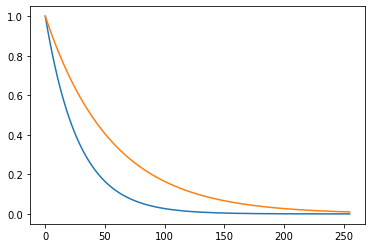

In [17]:
plt.plot(angle_rates)
plt.plot(angle_rates_2)
plt.show()

In [ ]:
positions = np.arange(num_positions) 
angle_rads = (positions[:, np.newaxis])*angle_rates[np.newaxis, :]

In [ ]:
fracPositions = positions*10/5
print(positions.shape)
print("")
print(positions[0:5])
print(fracPositions[0:5])

In [ ]:
angle_rads = fracPositions[:, np.newaxis]*angle_rates[np.newaxis, :]

In [ ]:
plt.figure(figsize = (14,8))
plt.pcolormesh(
    # Convert to degrees, and wrap around at 360
    angle_rads*180/(2*np.pi) % 360,
    # Use a cyclical colormap so that color(0) == color(360)
    cmap='hsv', vmin=0, vmax=360)

plt.xlim([0,len(angle_rates)])
plt.ylabel('Position')
plt.xlabel('Depth')
bar = plt.colorbar(label='Angle [deg]')
bar.set_ticks(np.linspace(0,360,6+1))

In [ ]:
# sines = np.sin(angle_rads)
# cosines = np.cos(angle_rads)
# pos_encoding = np.concatenate([sines, cosines], axis=-1)

# ### Merge sines and cosines  properly, not with concatenate.
# example = np.reshape(np.vstack((sines, cosines)).ravel('F'), (50, 512), order='F')

In [ ]:
# print(sines[31, 0:5])
# print(cosines[31, 0:5])
# print("")
# print(example[31, 0:10])

In [ ]:
# plt.figure(figsize=(25,5))
# plt.pcolormesh(pos_encoding, 
#                # Use a diverging colormap so it's clear where zero is.
#                cmap='RdBu', vmin=-1, vmax=1)
# plt.xlim([0,depth])
# plt.ylabel('Position')
# plt.xlabel('Depth')
# plt.colorbar()

In [ ]:
# plt.figure(figsize=(25,5))
# plt.pcolormesh(example, 
#                # Use a diverging colormap so it's clear where zero is.
#                cmap='RdBu', vmin=-1, vmax=1)
# plt.xlim([0,depth])
# plt.ylabel('Position')
# plt.xlabel('Depth')
# plt.colorbar()

### As Above But Simplified

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
num_positions = 16
depth = 512
min_rate = 1/10000

assert depth%2 == 0, "Depth must be even."
angle_rate_exponents = np.linspace(0,1,depth//2)
angle_rates = min_rate**(angle_rate_exponents)

In [ ]:
positions = np.arange(num_positions) 
angle_rads = (positions[:, np.newaxis])*angle_rates[np.newaxis, :]

In [ ]:
print(angle_rads.shape)
print(angle_rads[0, 0:5])
print(angle_rads[1, 0:5])
print(angle_rads[8, 0:5])

In [ ]:
fracPositions = positions*10/10

In [ ]:
angle_rads = fracPositions[:, np.newaxis]*angle_rates[np.newaxis, :]

In [ ]:
sines = np.sin(angle_rads)
cosines = np.cos(angle_rads)

### Merge sines and cosines  properly, not with concatenate.
example = np.reshape(np.vstack((sines, cosines)).ravel('F'), (num_positions, depth), order='F')

In [ ]:
plt.figure(figsize=(25,5))
plt.pcolormesh(example, 
               # Use a diverging colormap so it's clear where zero is.
               cmap='RdBu', vmin=-1, vmax=1)
plt.xlim([0,depth])
plt.ylabel('Position')
plt.xlabel('Depth')
plt.colorbar()
plt.show()

### Now Take Into Account The Batch Size

In [ ]:
# import numpy as np
# import matplotlib.pyplot as plt

In [ ]:
# batchSize = 6
# sequenceSize = 16
# depth = 512
# min_rate = 1/10000

# assert depth%2 == 0, "Depth must be even."
# angle_rate_exponents = np.linspace(0,1,depth//2)
# angle_rates = min_rate**(angle_rate_exponents)

In [ ]:
# positions = np.arange(num_positions) 
# timeStamps = np.tile(positions, (batchSize,1))

In [ ]:
# print(timeStamps)
# print(timeStamps.shape)

In [ ]:
# angle_rads = timeStamps[:, :, np.newaxis]*angle_rates[np.newaxis, np.newaxis, :]
# print(angle_rads.shape)

In [ ]:
# ### Compute sines And cosines, Merge Them properly, not with concatenate.

# finalTensor = np.empty((batchSize, sequenceSize, depth))
# for i in range(batchSize):
#     sines = np.sin(angle_rads[i, :, :])
#     cosines = np.cos(angle_rads[i, :, :])
#     arr = np.reshape(np.vstack((sines, cosines)).ravel('F'), (num_positions, depth), order='F')
#     finalTensor[i, :, :] = arr

In [ ]:
# plt.figure(figsize=(25,5))
# plt.pcolormesh(finalTensor[0, :, :], 
#                # Use a diverging colormap so it's clear where zero is.
#                cmap='RdBu', vmin=-1, vmax=1)
# plt.xlim([0,depth])
# plt.ylabel('Position')
# plt.xlabel('Depth')
# plt.colorbar()
# plt.show()

In [ ]:
# print(example.shape)
# print(finalTensor.shape)

In [ ]:
# ### Check That The Result Is Correct

# q = finalTensor[0, :, :]
# np.array_equal(finalTensor[5, :, :], example)

### Implement The Positional Encoding In A Function

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
### Implement The Positional Encoding In A Function

def positionalEncoding(sequence, depth):
    
    batchSize = sequence.shape[0]
    sequenceSize = sequence.shape[1]
    
    min_rate = 1/10000

    assert depth%2 == 0, "Depth must be even."
    angle_rate_exponents = np.linspace(0,1,depth//2)
    angle_rates = min_rate**(angle_rate_exponents)
    
    angle_rads = sequence[:, :, np.newaxis]*angle_rates[np.newaxis, np.newaxis, :]

    out = np.empty((batchSize, sequenceSize, depth))
    for i in range(batchSize):
        sines = np.sin(angle_rads[i, :, :])
        cosines = np.cos(angle_rads[i, :, :])
        arr = np.reshape(np.vstack((sines, cosines)).ravel('F'), (sequenceSize, depth), order='F')
        out[i, :, :] = arr
    
    return out

In [ ]:
### Test The Function

batchSize = 6
num_positions = 16
depth = 512

positions = np.arange(num_positions) 
timeStamps = np.tile(positions, (batchSize,1))

finalTensor = positionalEncoding(timeStamps, depth)

In [ ]:
plt.figure(figsize=(25,5))
plt.pcolormesh(finalTensor[0, :, :], 
               # Use a diverging colormap so it's clear where zero is.
               cmap='RdBu', vmin=-1, vmax=1)
plt.xlim([0,depth])
plt.ylabel('Position')
plt.xlabel('Depth')
plt.colorbar()
plt.show()

In [ ]:
### Check That The Result Is Correct

q = finalTensor[0, :, :]
np.array_equal(finalTensor[5, :, :], example)